# Modulo 14 Tarefa 01 - Geração de Gráficos Automatizada com Jupyter Notebook

## Descrição da Tarefa
- **Objetivo:** Criar um **Jupyter Notebook** que:
  1. Importe as bibliotecas necessárias.
  2. Gere gráficos para as bases de dados dos meses de **março, abril, maio, junho e dezembro**.
  3. Utilize uma abordagem automatizada para facilitar a criação de gráficos.
  4. Descreva na última célula como esse processo pode ser adaptado para **novos meses e anos**.


In [1]:
# 1 - Importação e configuração.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob  # Para carregar arquivos automaticamente
import os

# Configuração geral para os gráficos
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)  # Tamanho padrão dos gráficos


In [2]:
# 2: Função para Carregar Dados de Forma Automatizada

# Célula 2: Função para carregar os dados dinamicamente
def carregar_dados(meses, ano=2019, caminho_base='./'):
    """
    Carrega e concatena os dados dos meses especificados.

    Parâmetros:
    - meses: Lista com os nomes dos meses em maiúsculo (ex: ['MAR', 'ABR']).
    - ano: Ano dos dados (padrão: 2019).
    - caminho_base: Diretório onde estão os arquivos CSV.

    Retorna:
    - DataFrame concatenado com os dados dos meses fornecidos.
    """
    frames = []
    for mes in meses:
        nome_arquivo = f"SINASC_RO_{ano}_{mes}.csv"
        caminho_completo = os.path.join(caminho_base, nome_arquivo)
        if os.path.exists(caminho_completo):
            df = pd.read_csv(caminho_completo)
            df['MES'] = mes  # Adiciona uma coluna com o nome do mês
            frames.append(df)
        else:
            print(f"Aviso: Arquivo {nome_arquivo} não encontrado.")

    return pd.concat(frames, ignore_index=True) if frames else pd.DataFrame()


In [4]:
 # 3: Carregando os Dados dos Meses Especificados.

meses_selecionados = ['MAR', 'ABR', 'MAI', 'JUN', 'DEZ']
dados = carregar_dados(meses_selecionados)

# Verificando as primeiras linhas para garantir que os dados foram carregados
dados.head()


,IDADEMAE,SEXO,APGAR1,APGAR5,PESO,CONSULTAS,DTNASC,GESTACAO,GRAVIDEZ,ESCMAE,IDADEPAI,MES
0,19,Masculino,9.0,10.0,3685,4,2019-02-19,37 a 41 semanas,Única,8 a 11 anos,26.0,MAR
1,29,Feminino,8.0,9.0,3055,4,2019-02-21,37 a 41 semanas,Única,8 a 11 anos,24.0,MAR
2,37,Feminino,8.0,10.0,3460,4,2019-02-25,37 a 41 semanas,Única,8 a 11 anos,32.0,MAR
3,30,Feminino,9.0,10.0,2982,3,2019-03-20,37 a 41 semanas,Única,12 anos ou mais,24.0,MAR
4,30,Feminino,8.0,10.0,3310,4,2019-03-23,37 a 41 semanas,Única,8 a 11 anos,27.0,MAR


In [5]:
# 4: Função para Gerar Gráficos Automatizados

def gerar_graficos(df, variavel, tipo_grafico='hist', titulo='Gráfico de Frequência'):
    """
    Gera gráficos automatizados para uma variável específica.

    Parâmetros:
    - df: DataFrame contendo os dados.
    - variavel: Nome da variável para análise.
    - tipo_grafico: Tipo de gráfico ('hist' para histograma ou 'box' para boxplot).
    - titulo: Título do gráfico.
    """
    plt.figure()
    if tipo_grafico == 'hist':
        sns.histplot(df[variavel].dropna(), kde=True)
    elif tipo_grafico == 'box':
        sns.boxplot(x='MES', y=variavel, data=df)
    else:
        print(f"Tipo de gráfico '{tipo_grafico}' não suportado.")
        return

    plt.title(titulo)
    plt.show()


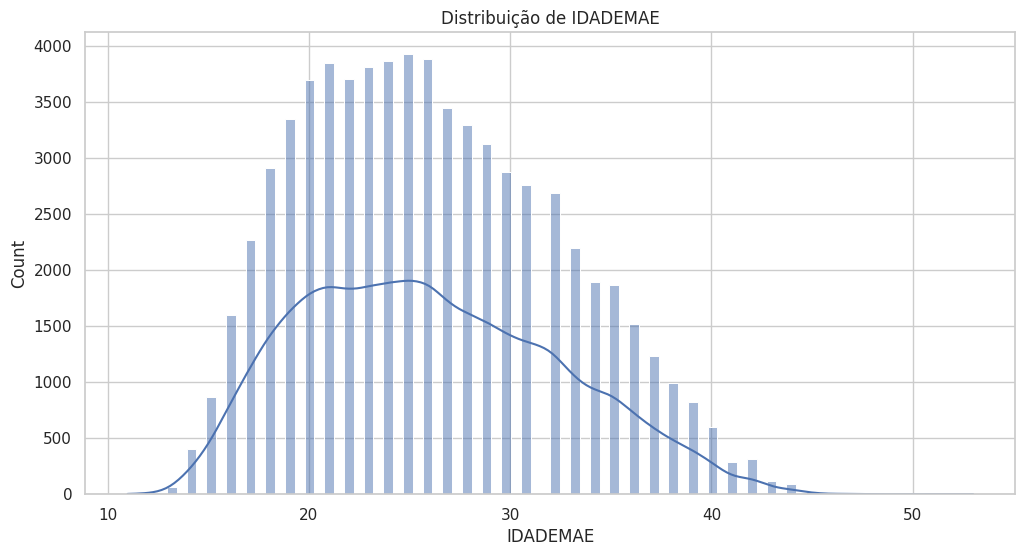

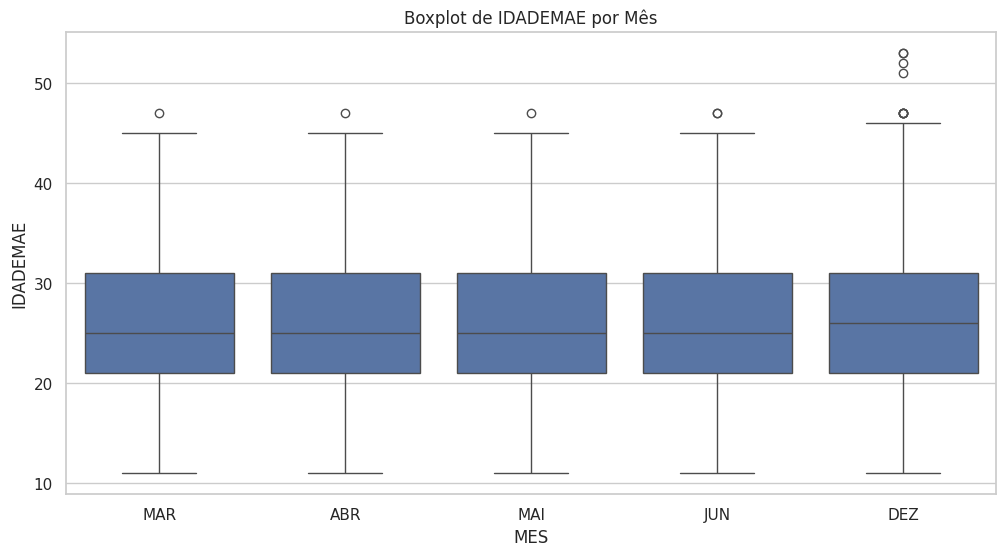


Resultados para a variável: IDADEMAE
count    68429.000000
mean        26.056307
std          6.372259
min         11.000000
25%         21.000000
50%         25.000000
75%         31.000000
max         53.000000
Name: IDADEMAE, dtype: float64


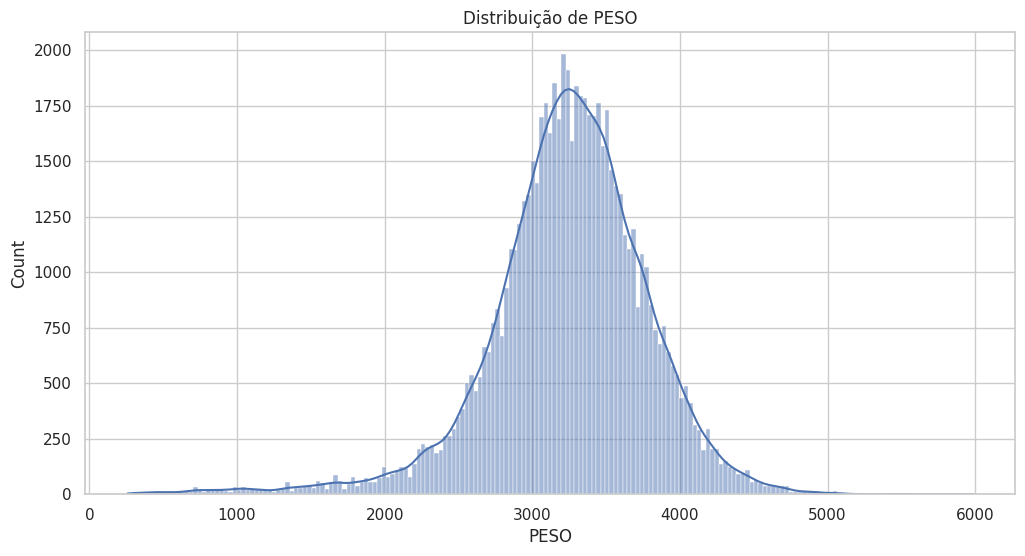

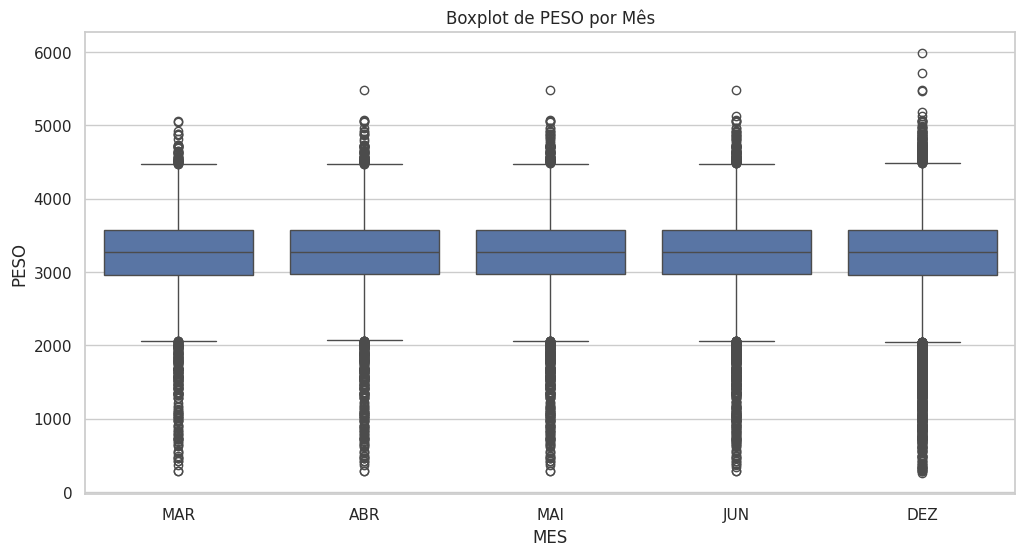


Resultados para a variável: PESO
count    68429.000000
mean      3244.393459
std        543.165193
min        258.000000
25%       2965.000000
50%       3270.000000
75%       3575.000000
max       5985.000000
Name: PESO, dtype: float64


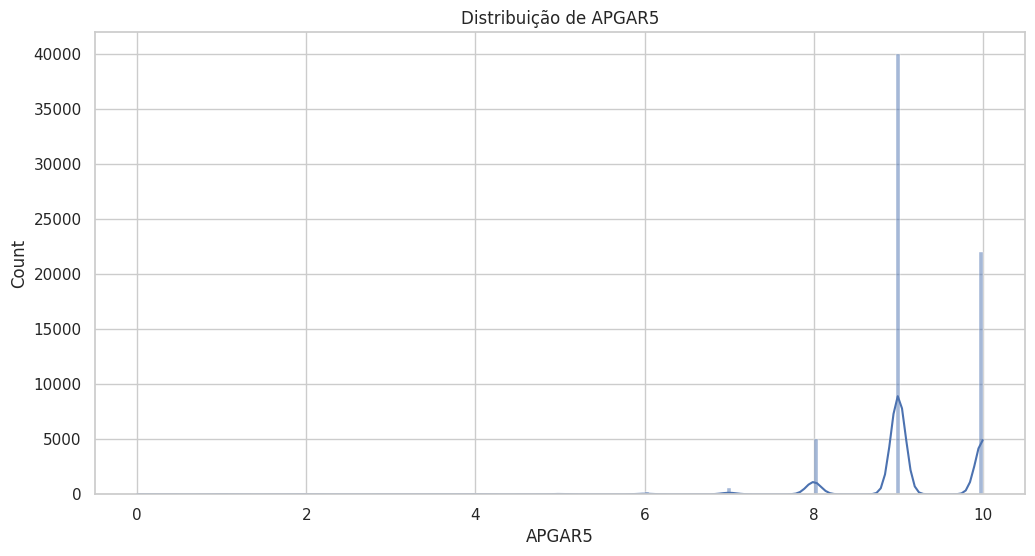

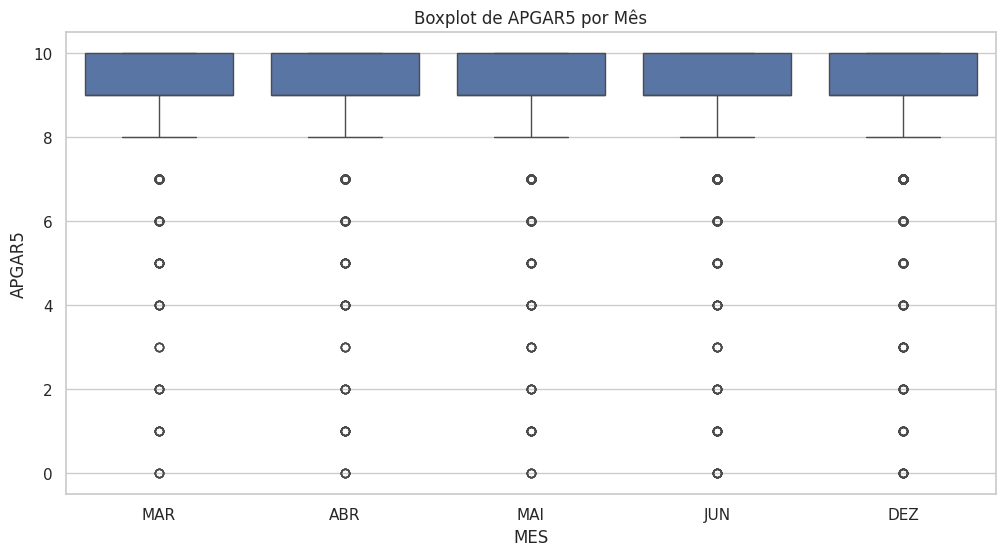


Resultados para a variável: APGAR5
count    68168.000000
mean         9.188476
std          0.807334
min          0.000000
25%          9.000000
50%          9.000000
75%         10.000000
max         10.000000
Name: APGAR5, dtype: float64


In [8]:
# 5: Gerando Gráficos para Variáveis de Interesse

variaveis_interesse = ['IDADEMAE', 'PESO', 'APGAR5']  # Exemplo de variáveis
for var in variaveis_interesse:
    gerar_graficos(dados, var, tipo_grafico='hist', titulo=f'Distribuição de {var}')
    gerar_graficos(dados, var, tipo_grafico='box', titulo=f'Boxplot de {var} por Mês')


    # Imprimir resultados finais
    print(f"\nResultados para a variável: {var}")
    print(dados[var].describe())  # Estatísticas descritivas


#  Análise das Variáveis IDADEMAE, PESO e APGAR5

## Introdução
Este relatório apresenta a análise das variáveis relacionadas à saúde de recém-nascidos, com foco em **IDADEMAE**, **PESO** e **APGAR5**.

## Resultados Estatísticos

### Variável: IDADEMAE
- **Total de Observações (count)**: 68,429
- **Média (mean)**: 26.06 anos
- **Desvio Padrão (std)**: 6.37 anos
- **Mínimo (min)**: 11 anos
- **25º Percentil (25%)**: 21 anos
- **Mediana (50%)**: 25 anos
- **75º Percentil (75%)**: 31 anos
- **Máximo (max)**: 53 anos

### Variável: PESO
- **Total de Observações (count)**: 68,429
- **Média (mean)**: 3,244.39 g
- **Desvio Padrão (std)**: 543.17 g
- **Mínimo (min)**: 258 g
- **25º Percentil (25%)**: 2,965 g
- **Mediana (50%)**: 3,270 g
- **75º Percentil (75%)**: 3,575 g
- **Máximo (max)**: 5,985 g

### Variável: APGAR5
- **Total de Observações (count)**: 68,168
- **Média (mean)**: 9.19
- **Desvio Padrão (std)**: 0.81
- **Mínimo (min)**: 0
- **25º Percentil (25%)**: 9.00
- **Mediana (50%)**: 9.00
- **75º Percentil (75%)**: 10.00
- **Máximo (max)**: 10.00

## Análise Descritiva

### IDADEMAE
- A média de **26.06 anos** sugere que a maioria das mães está na faixa etária jovem-adulta.
- A idade mínima de **11 anos** e a máxima de **53 anos** indicam variações significativas, com a necessidade de atenção especial a casos de mães muito jovens.

### PESO
- A média de **3,244.39 g** está dentro da faixa considerada saudável para recém-nascidos.
- O peso mínimo de **258 g** sugere a ocorrência de prematuros ou outros casos críticos, enquanto o máximo de **5,985 g** aponta para casos de macrossomia.

### APGAR5
- A média de **9.19** e o desvio padrão de **0.81** indicam que a maioria dos recém-nascidos apresenta boas condições de saúde ao nascer.
- A presença de um valor mínimo de **0** destaca a importância do monitoramento cuidadoso em casos críticos.

## Conclusão
As variáveis analisadas revelam informações importantes sobre a saúde materna e infantil. A idade média das mães é relativamente jovem, com alguns casos extremos que devem ser considerados em termos de suporte e intervenções. O peso dos recém-nascidos mostra que a maioria está em condições saudáveis, mas também existem casos que requerem atenção. Por fim, a pontuação do **APGAR5** sugere que a saúde neonatal é, em sua maioria, satisfatória, embora casos críticos necessitem de monitoramento e cuidados adicionais.

Recomenda-se continuar a investigação sobre a relação entre estas variáveis e outros fatores, como condições socioeconômicas e acesso a cuidados pré-natais, para uma compreensão mais profunda da saúde materna e neonatal.
